# Scientific Computing
## Exercises - Matteo Boschini

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Latin Modern Roman"
})
%config InlineBackend.figure_format='retina'

## L01 - python basics

### Q7/Q10: Tic - Tac - Toe

In [22]:
from IPython.display import clear_output

In [ ]:
class TicTacToe:
    """Tic-Tac-Toe class. This class incorporates all the functions 
    to play the famous tic-tac-toe game between two players"""

    def __init__(self):
        """Class constructor. Initialize the basic elements"""
        self.move = {f's{i}':"" for i in range(1,10)}
        self.board = """
 {s1:^3} | {s2:^3} | {s3:^3}       1  2  3
-----+-----+-----
 {s4:^3} | {s5:^3} | {s6:^3}       4  5  6
-----+-----+-----      
 {s7:^3} | {s8:^3} | {s9:^3}       7  8  9       
                         
"""
        self.wins = {'Player 1':0, 'Player 2':0, 'Draw':0}

    def reset_board(self):
        """Reset the board keeping the scoring"""
        self.move = {f's{i}':"" for i in range(1,10)}
        self.board = """
 {s1:^3} | {s2:^3} | {s3:^3}       1  2  3
-----+-----+-----
 {s4:^3} | {s5:^3} | {s6:^3}       4  5  6
-----+-----+-----      
 {s7:^3} | {s8:^3} | {s9:^3}       7  8  9       
                         
"""

        
    def show_board(self):
        """Display the current state of the board"""
        print(self.board.format(**self.move), end='\r')


    def get_move(self, n, XO):
        """Ask the current player, n, to make a move -- make sure the square was not 
        already played.  XO is a string of the character (X or O) we will place in
        the desired square """
        valid_move = False
        while not valid_move:
            idx = input(f'Player {n}, enter your move (1-9) (or q to quit): ')
            if idx == 'q':
                quit()
            try: 
                if int(idx) in range(1, 10) and self.move[f's{idx}'] == "":
                    valid_move = True
                else:
                    print(f'Invalid move: {self.move[f"s{idx}"]}')
            except ValueError:
                print('Please, enter a valid move')
              
        self.move[f's{idx}'] = XO


    def check_winner(self):
        """Check for winning conditions. This function checks the board looking for three identical symbols
        on the same row, column or diagonal"""
        win = False
        winner = None
        symb2player = lambda s : 1 if(s == 'X') else 2
        for i in [1, 2, 3]:
            if self.move[f's{i}'] == self.move[f's{i+3}'] == self.move[f's{i+6}'] != '':
                win = True
                winner = symb2player(self.move[f's{i}'])
                
        for i in [1, 4, 7]:
            if self.move[f's{i}'] == self.move[f's{i+1}'] == self.move[f's{i+2}'] != '':
                win = True
                winner = symb2player(self.move[f's{i}'])
                
        if self.move[f's{1}'] == self.move[f's{5}'] == self.move[f's{9}'] != '':
                win = True
                winner = symb2player(self.move[f's{5}'])
            
        if self.move[f's{3}'] == self.move[f's{5}'] == self.move[f's{7}'] != '':
                win = True
                winner = symb2player(self.move[f's{5}'])
            
        return win, winner     


    def play_a_game(self):
        """Play a single game of tic-tac-toe """
        rand_start = input('Start the game with a random player (y/n): ')
        if rand_start == 'y':
            player = {1,2}.pop()
        else:
            player = input('Insert starting player (1 or 2): ')
            if player not in ['1', '2']: 
                player = input('Please insert a valid starting player (1 or 2): ')

        self.show_board()
    
        while '' in self.move.values():
            if player == 1: XO = 'X'
            else: XO = 'O'
            self.get_move(player, XO)
            self.show_board()
            player = ({1,2} - {player}).pop()
            win, winner = self.check_winner()
            if win:
                self.wins[f'Player {winner}'] += 1
                print(f'Congrats player {winner}, you are the winner!')
                return winner
            
        self.wins['Draw'] += 1
        print('Draw')
        

    def score(self):
        """Display the current score"""
        print(f"""
----------------------
Player 1 | {self.wins['Player 1']}
----------------------
Player 2 | {self.wins['Player 2']}
----------------------
Draw     | {self.wins['Draw']}
----------------------
""")
        

    def play(self):
        """Play Tic - Tac - Toe"""
        
        print("""\n 
        *******************
        *\033[1m Tic - Tac - Toe \033[0m*
        *******************
        \n""")

        want2play = True

        while want2play:
            game = self.play_a_game()
            self.reset_board()
            
            if input('See score? y/n') == 'y':
                self.score()
            
            if input('Play again? y/n') == 'n':
                want2play = False
                
        print('\n\n\033[1mFinal score \033[0m')
        self.score()
            

In [ ]:
game = TicTacToe()
game.play()


 
        *******************
        * Tic - Tac - Toe *
        *******************
        


     |     |           1  2  3
-----+-----+-----
     |     |           4  5  6
-----+-----+-----      
     |     |           7  8  9       
                         

  X  |     |           1  2  3
-----+-----+-----
     |     |           4  5  6
-----+-----+-----      
     |     |           7  8  9       
                         

  X  |  O  |           1  2  3
-----+-----+-----
     |     |           4  5  6
-----+-----+-----      
     |     |           7  8  9       
                         
Please, enter a valid move
Please, enter a valid move
Please, enter a valid move


### Q9: Poker odds

In [23]:
from deckOfCards import *
from scipy.special import binom

def checkPoints(hands):
    """Check for points in a hand of cards. 
    Possible points: pair, two pair, three of a kind (trips), straight, flush, full house, four of a kind (quads), straight flush, royal flush
    Suits = spade (1), heart (2), diamond (3), club (4)
    """
    points = {'high card': 0, 'pair':0, 'two pair':0, 'three of a kind':0, 'straight':0, 'flush':0, 'full house':0, 
              'four of a kind':0, 'straight flush':0, 'royal flush':0}
    
    for hand in hands:
        ranks = [card.rank for card in hand]
        suits = [card.suit for card in hand]
    
        rank_counts = {f'{val}':ranks.count(val) for val in list(set(ranks))}
        suit_counts = {f'{val}':suits.count(val) for val in list(set(suits))}

        if 5 in suit_counts.values():
            if sorted(ranks) == [10,11,12,13,14]:
                points['royal flush'] += 1
            elif sorted(ranks)[-1] == sorted(ranks)[0]+4 or sorted(ranks) == [2,3,4,5,14]:
                points['straight flush'] += 1
            else:
                points['flush'] += 1

        elif sorted(ranks - np.min(ranks)) == [0,1,2,3,4] or sorted(ranks) == [2,3,4,5,14]:
            points['straight'] += 1

        elif 4 in rank_counts.values():
            points['four of a kind'] += 1
        elif 3 in rank_counts.values():
            if 2 in rank_counts.values():
                points['full house'] += 1
            else:
                points['three of a kind'] += 1
        elif 2 in rank_counts.values():
            if list(rank_counts.values()).count(2) == 2:
                points['two pair'] += 1
            else:
                points['pair'] += 1
        else:
            points['high card'] += 1
            
    return points

In [24]:
manyHands = []

for i in range(500000):
    mydeck = Deck()
    mydeck.shuffle()
    manyHands += [mydeck.get_cards(5)]

points = checkPoints(manyHands)

In [25]:
tot = binom(52, 5)
true_prob = {
    'high card': (binom(13,5) - binom(10,1))*(binom(4,1)**5 - binom(4,1))/tot,
    'pair':binom(13,1)*binom(4,2)*binom(12,3)*binom(4,1)**3/tot, 
    'two pair':binom(13,2)*binom(4,2)**2*binom(11,1)*binom(4,1)/tot, 
    'three of a kind':binom(13,1)*binom(4,3)*binom(12,2)*binom(4,1)**2/tot, 
    'straight':binom(10,1)*binom(4,1)*(binom(4,1)**4 - 1)/tot, 
    'flush':binom(4,1)*(binom(13,5) - binom(10,1))/tot, 
    'full house':binom(13,1)*binom(4,3)*binom(12,1)*binom(4,2)/tot, 
    'four of a kind':binom(13,1)*binom(4,4)*binom(12,1)*binom(4,1)/tot,
    'straight flush':binom(4,1)*(binom(10,1) - 1)/tot, 
    'royal flush':binom(4,1)/tot    
}

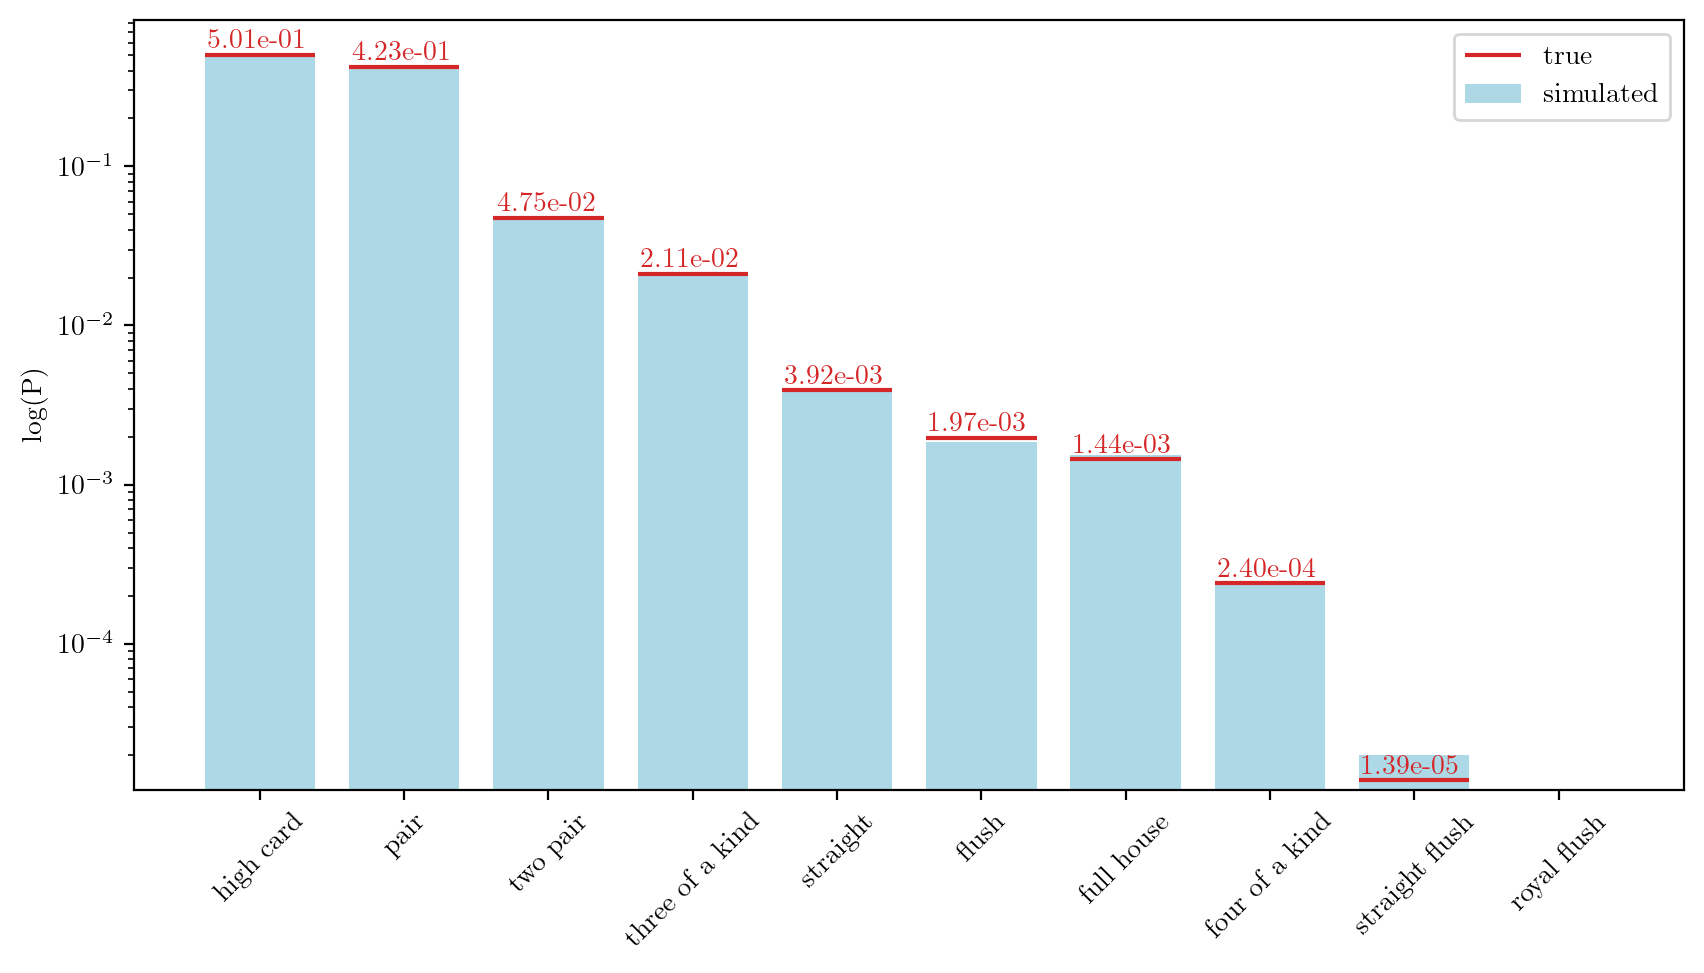

In [26]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

x = np.linspace(1,len(points.keys())+1, len(points.keys()))
plot = ax.bar(x, [n/len(manyHands) for n in list(points.values())], color='lightblue', log=True, \
              width=0.85, label='simulated')
ax.hlines(true_prob.values(), x-0.425, x+0.425, color='C3', label='true')
for i, val in enumerate(true_prob.values()):
    ax.annotate('{:1.2e}'.format(val), (x[i]-0.4, 1.1*val), color='C3')
ax.set_xticks(np.linspace(1,len(points.keys())+1, len(points.keys())), [x for x in list(points.keys())])
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel('log(P)')
ax.legend()

## L02 - Numpy

### Q3: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

In [27]:
def mean(a):
    sum = 0
    for el in a:
        sum += el
    return sum/a.shape[0]

def std(a):
    a_mean = mean(a)
    sq_sum = 0
    for el in a:
        sq_sum += (el-a_mean)**2
    return (sq_sum/a.shape[0])**(1/2)

In [28]:
import time

n_points = np.logspace(1, 6, 20, dtype=int)
trials = 10
time_matteo, time_numpy = [], []
for n in tqdm(n_points):
    tmp_matteo, tmp_numpy = [], []
    for i in range(trials):
        t = np.random.random(n)
        
        start = time.time()
        #std_matteo = std(t)
        std(t)
        tmp_matteo += [time.time()-start]
        
        start = time.time()
        #std_numpy = np.std(t)
        np.std(t)
        tmp_numpy += [time.time()-start]
    time_matteo += [np.mean(tmp_matteo)]
    time_numpy += [np.mean(tmp_numpy)]

  0%|          | 0/20 [00:00<?, ?it/s]

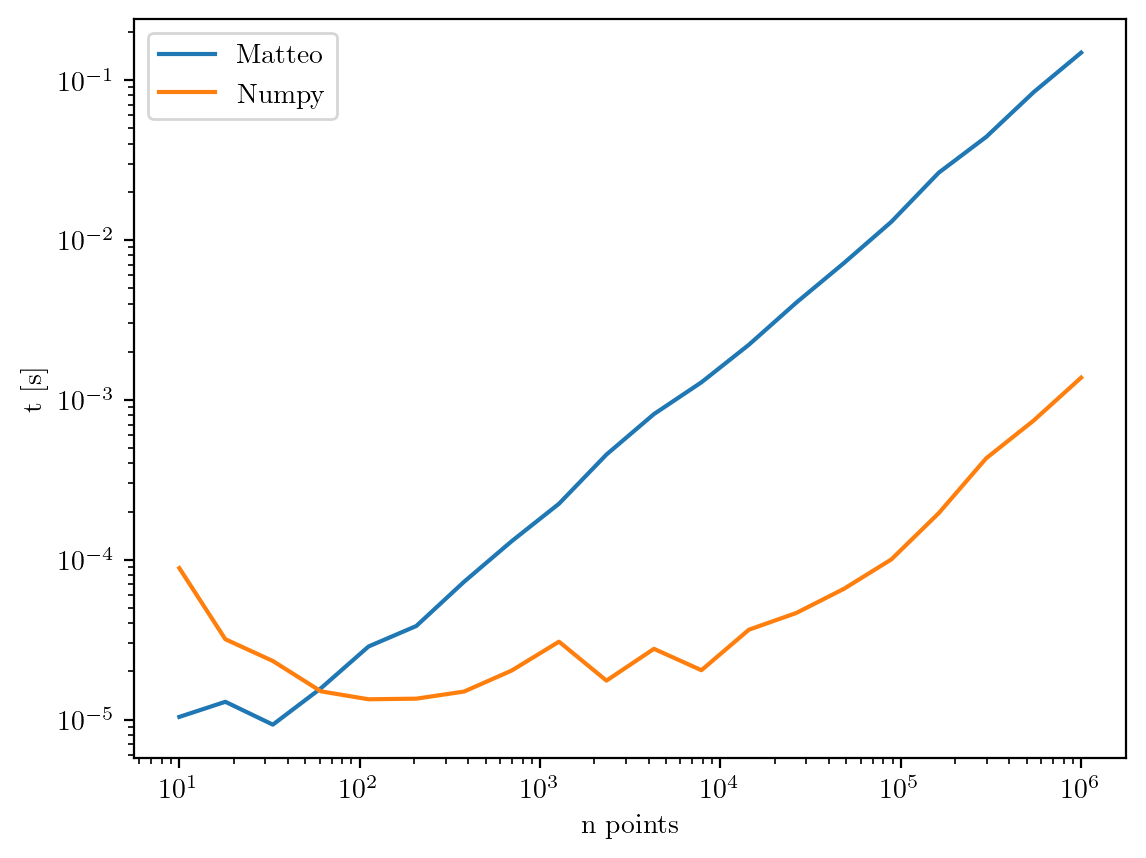

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_points, time_matteo, label='Matteo')
ax.plot(n_points, time_numpy, label='Numpy')
ax.set_xlabel('n points')
ax.set_ylabel('t [s]')
ax.semilogx()
ax.semilogy()
plt.legend()

### Q6: Conway's Game of Life

**Exercise**: Code up Conway's Game of Life using numpy 

The Game of Life is a cellular automaton devised by mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor or any other Turing machine.

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

The Game of Life is *really* (really, really) cool. There are just four extremely simple rules, and these result in an immense richness of behaviour and complexity.

https://www.youtube.com/watch?v=C2vgICfQawE&t=221s&ab_channel=RationalAnimations

https://www.youtube.com/watch?v=jvSp6VHt_Pc&ab_channel=TheDevDoctor

Here some web apps to play:

https://conwaylife.com/

https://playgameoflife.com/

Some computational hints:

https://blog.datawrapper.de/game-of-life/

For instance, here is a Game-of-Life structure that sends a message at fixed intervals (that little spaceship leaving toward the bottom right)

![](https://blog.datawrapper.de/wp-content/uploads/2021/06/game-of-life-loop-cropped.gif)


In [ ]:
import matplotlib.animation as animation
from functools import partial
from IPython.display import HTML

In [37]:
class game_of_life:
    r"""Play Game of Life"""

    def __init__(self, size, initstate, epochs):
        self.size = size
        self.grid = initstate
        self.epochs = epochs
        

    def find_neighbours(self):
        neighbours = []
        Xs, Ys = np.meshgrid(np.arange(0, self.size[0]), np.arange(0, self.size[1]))
        for x, y in zip(Xs.flatten(), Ys.flatten()):
                xs = x+np.array([-1,0,1])
                ys = y+np.array([-1,0,1])
                X_, Y_ = np.meshgrid(xs[(xs>=0) & (xs<self.size[0])], ys[(ys>=0) & (ys<self.size[1])])
                neighbours += [[[x_, y_] for x_,y_ in zip(X_.flatten(), Y_.flatten()) if [x_,y_]!=[x,y]]]
        self.neighbours = neighbours
    
    
    def next_gen(self, frame, ax, art):
        next_state = self.grid.copy()
        Xs, Ys = np.meshgrid(np.arange(0, self.size[0]), np.arange(0, self.size[1]))
        for x, y in zip(Xs.flatten(), Ys.flatten()):
            n_neighbours = np.sum([self.grid[el[0], el[1]]for el in self.neighbours[x+y*self.size[0]]])
            if self.grid[x,y] == 1:
                if n_neighbours < 2 or n_neighbours > 3:
                    next_state[x,y] = 0
            else:
                if n_neighbours == 3:
                    next_state[x,y] = 1   
        self.grid = next_state
        art = ax.matshow(self.grid, animated=True)
        return art
        
    
    def play(self):
        self.find_neighbours()
        
        fig = plt.figure(figsize=(5,5*self.size[0]/self.size[1]))
        ax = fig.add_subplot(111)
        ax.axis('off')
        showstate = ax.matshow(self.grid, animated=True)
        
        anim = animation.FuncAnimation(fig=fig, func=partial(self.next_gen, ax=ax, art=showstate), \
                                       frames=self.epochs, blit=False)
        plt.show()
        return anim   

In [38]:
size = (10,20)
init = np.random.choice([0,1], size=size, p=(0.7, 0.3))

In [ ]:
%matplotlib notebook

GoL = game_of_life(size, init, 50)
anim = GoL.play()
HTML(anim.to_jshtml())

<IPython.core.display.Javascript object>

In [42]:
%matplotlib inline

## L03 - Matplotlib

### Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

#### Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [45]:
f = open("shore_leave.txt", "r")
text = [word.strip('.,!?:;-_()').lower() for word in f.read().split()]
unique = set(text)
words = {s:text.count(s) for s in unique}
sorted_words = [s for s,n in sorted(words.items(), key = lambda x : x[1], reverse=True)]

(0.0, 27.0)

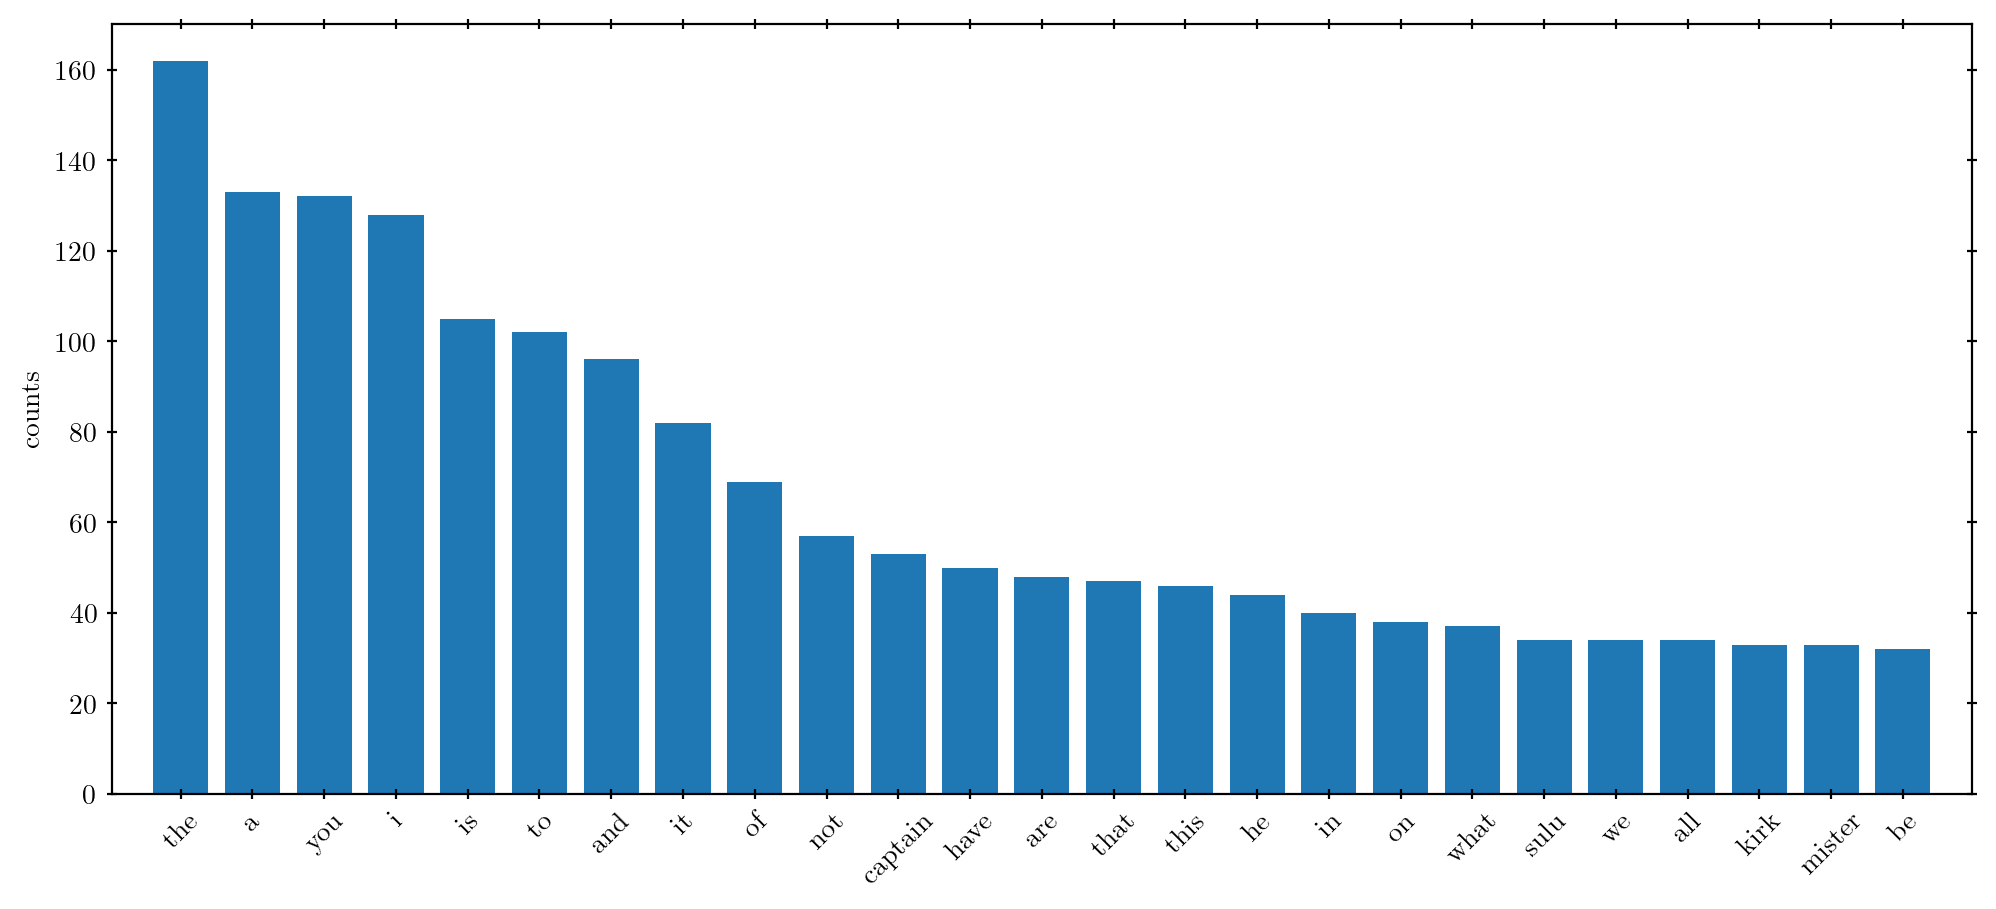

In [55]:
num_words = 25

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.bar(np.linspace(1,num_words+1, num_words), [words[x] for x in sorted_words[:num_words]])
ax.set_xticks(np.linspace(1,num_words+1, num_words), [x for x in sorted_words[:num_words]], rotation=45)
ax.set_ylabel('counts')
ax.tick_params(axis='both', top=True, right=True, direction='inout')
ax.set_xlim(0, num_words+2)

### Q8: Game of Life visualization

If you've implemented Conway's Game of Life from last lecture, make a visualization of your result using matplotlib.

See L02/Q6

## L04 - Scipy

### Q2: Interpolation error

There are a large number of different interpolation schemes available through scipy.  Let's test them out.

Create a python function, $f(x)$, that is your true function (make it complicated!).  Now create $N$ samples of it (either regularly spaced or irregularly spaced).

Try some of the different interpolation routines.  `interpolate.interp1d` takes a `kind` argument that let's you choose the order of the interpolation.  Measure the error in the method, by comparing the interpolated result with the actual function value.  

Then do the same cubic splines (look at `CubicSpline`)

Plot the resulting interpolant.

In [47]:
from scipy.interpolate import interp1d, CubicSpline
from sklearn.gaussian_process import GaussianProcessRegressor

def f(x):
    return 10*np.abs(np.sin(x/3))*np.exp(-(x/5)**2) + (x/8)**2 + x/2

Text(0, 0.5, 'f(x)')

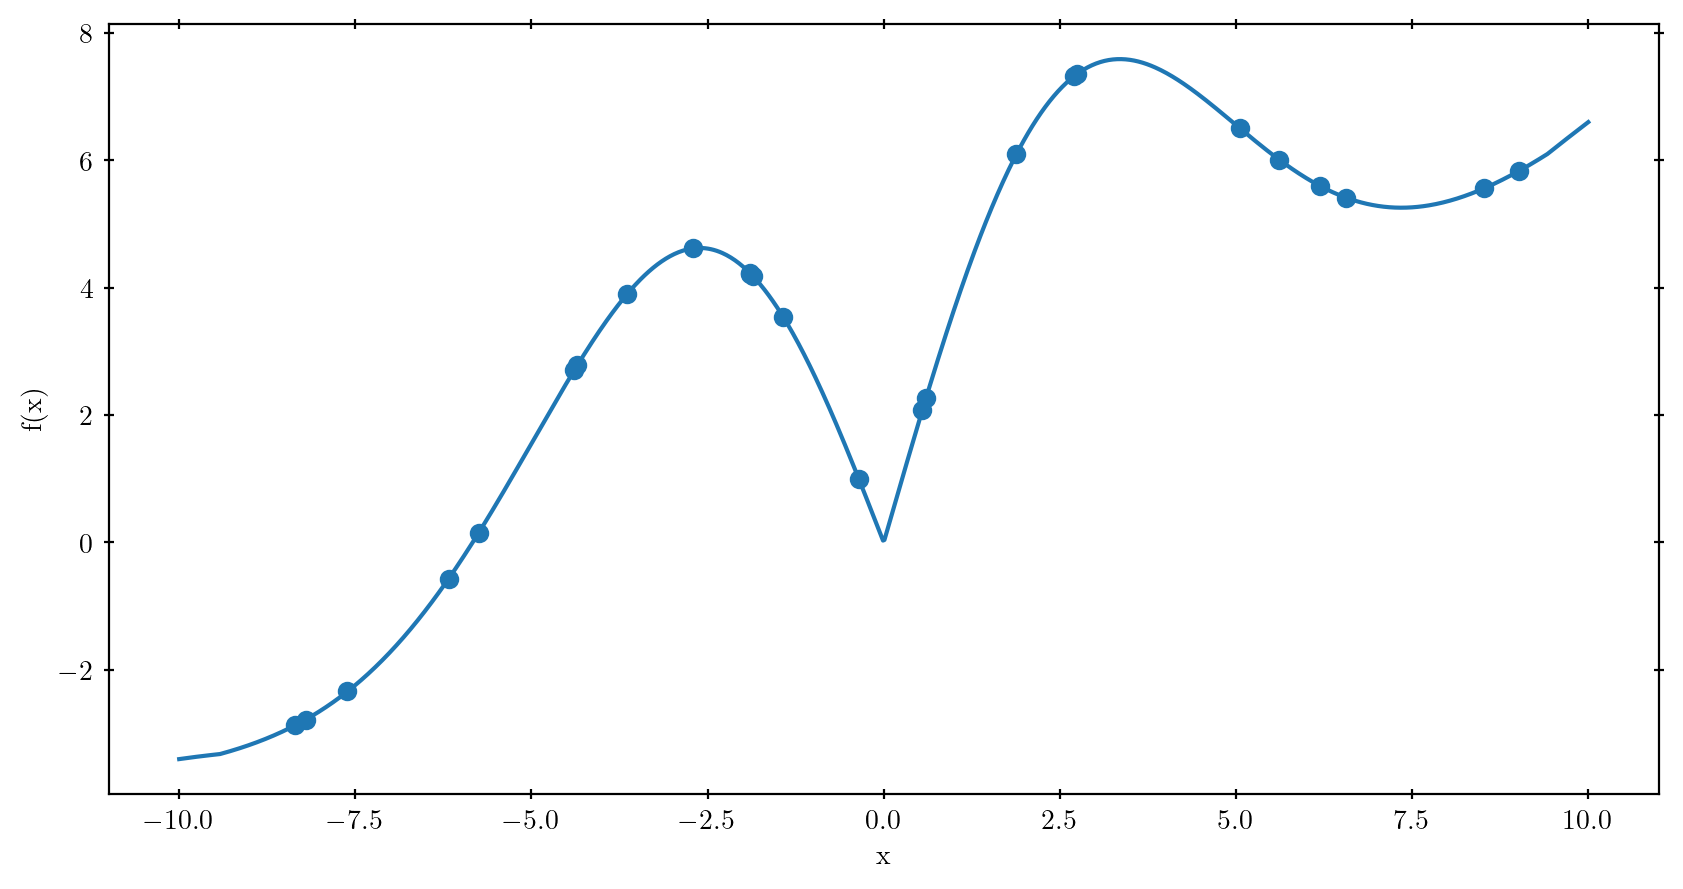

In [56]:
x = np.linspace(-10,10,1000)
x_samp = np.array(sorted(np.random.uniform(low=-10, high=10, size=25)))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(x, f(x))
ax.scatter(x_samp, f(x_samp))

ax.tick_params(axis='both', top=True, right=True, direction='inout')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

In [57]:
interp1 = interp1d(x_samp, f(x_samp), kind='nearest', fill_value='extrapolate')
interp2 = interp1d(x_samp, f(x_samp), kind='linear', fill_value='extrapolate')
interp3 = interp1d(x_samp, f(x_samp), kind='quadratic', fill_value='extrapolate')
interp4 = CubicSpline(x_samp, f(x_samp))
interp5 = GaussianProcessRegressor().fit(x_samp[:,np.newaxis], f(x_samp[:,np.newaxis]))

interp = {'nearest':interp1, 'linear':interp2, 'quadratic':interp3, 'cubic':interp4, 'gpr':interp5}

In [58]:
RMSE = {'nearest':0, 'linear':0, 'quadratic':0, 'cubic':0, 'gpr':0}

for method in RMSE.keys():
    if method == 'gpr':
        RMSE[method] = np.sqrt(np.mean((f(x) - interp[method].predict(x[:,np.newaxis]))**2))
    else:
        RMSE[method] = np.sqrt(np.mean((f(x) - interp[method](x))**2))

Text(0, 0.5, '$f(x) - f_{interp}(x)$')

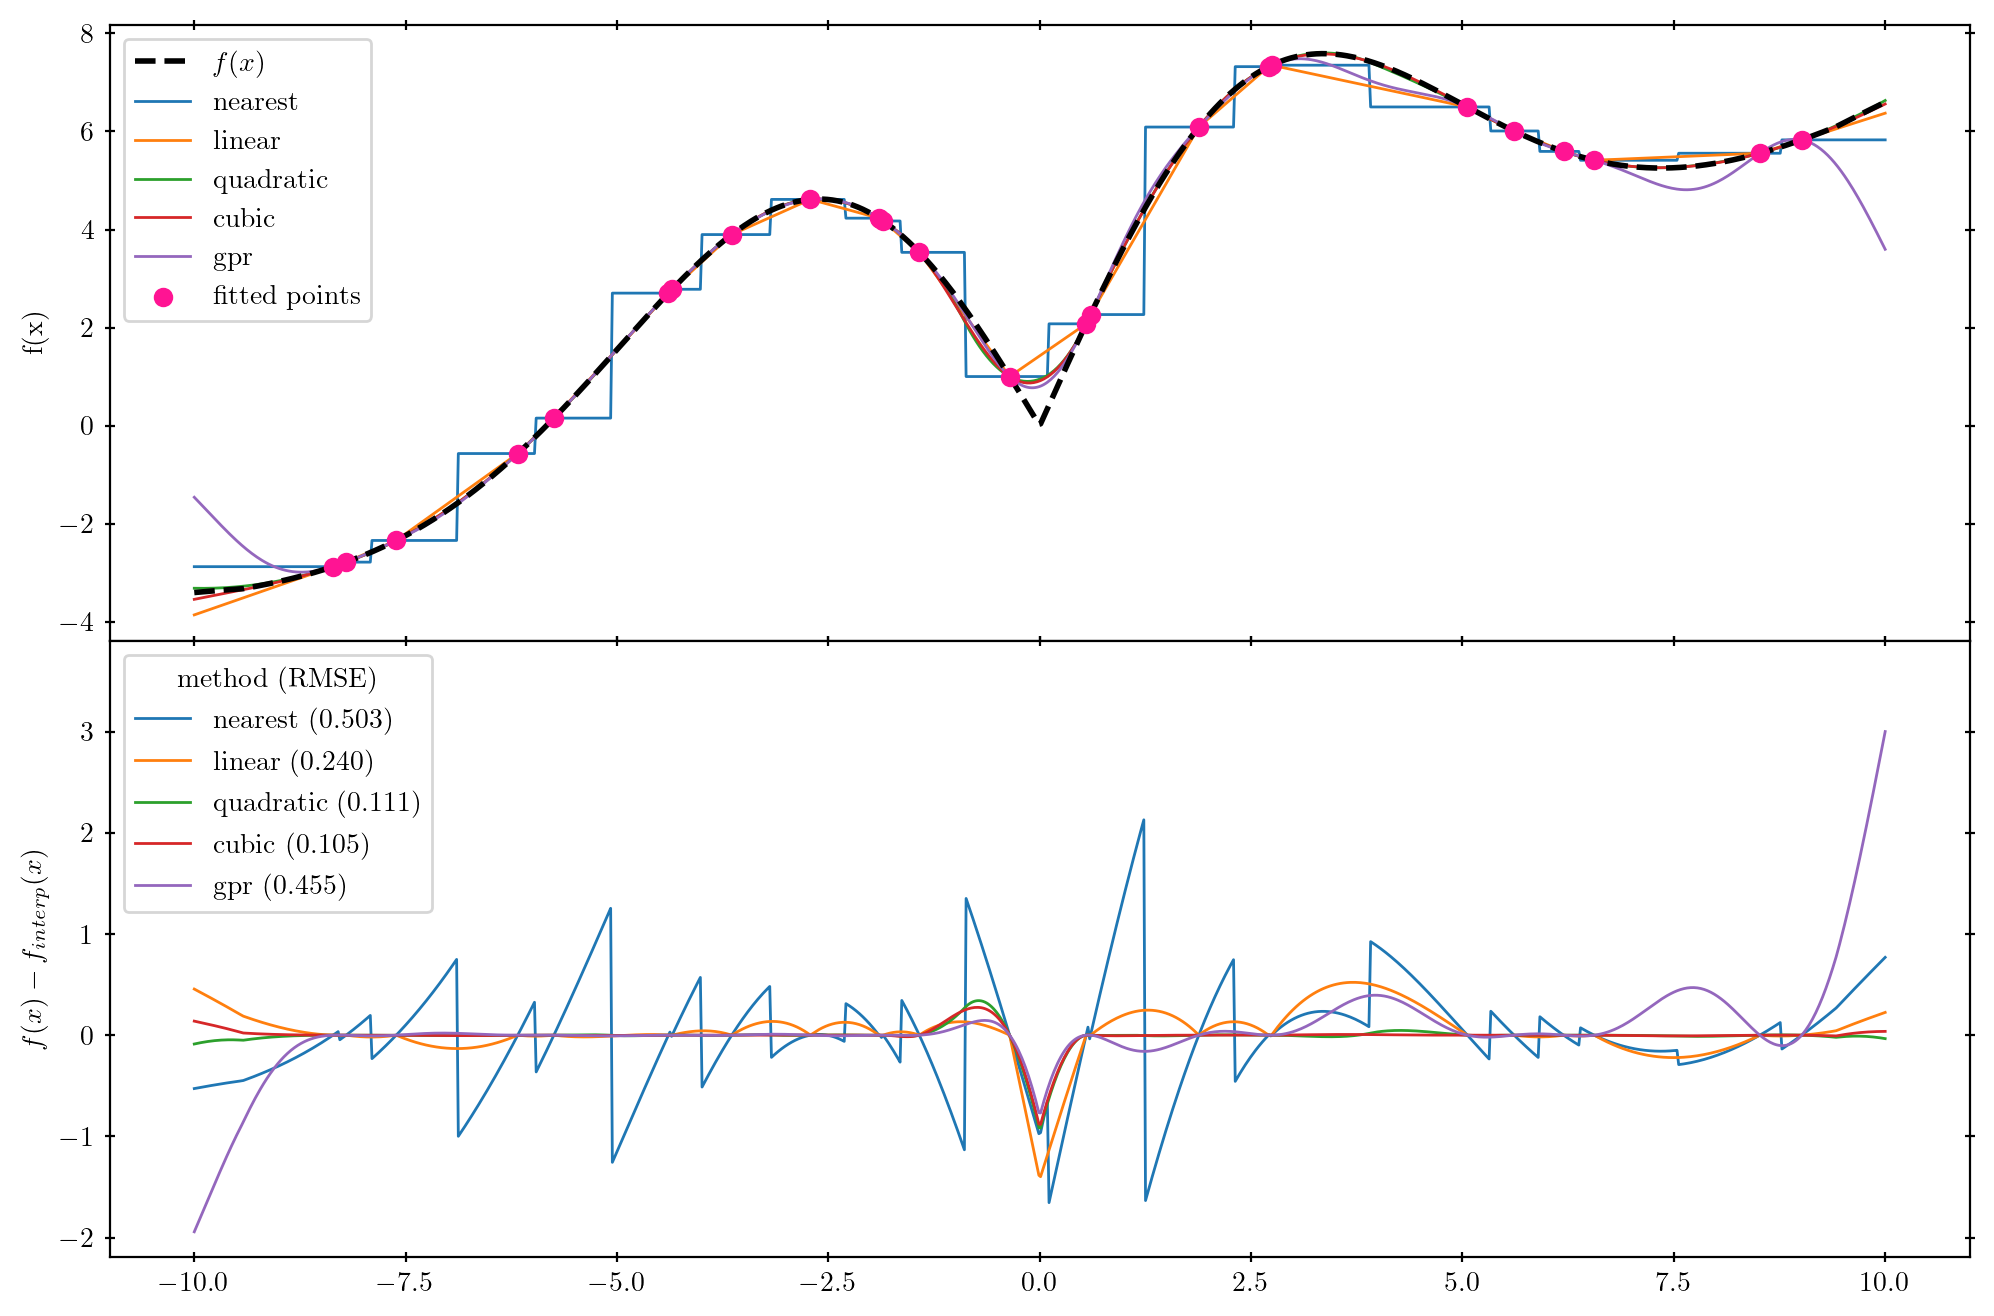

In [61]:
fig = plt.figure(figsize=(12,8))
axs = fig.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(x, f(x), color='k', linewidth=2, linestyle='--', zorder=9, label=r'$f(x)$')
for method in interp.keys():
    if method == 'gpr':
        axs[0].plot(x, interp[method].predict(x[:,np.newaxis]), linewidth=1, label=method)
    else:
        axs[0].plot(x, interp[method](x), linewidth=1, label=method)
axs[0].scatter(x_samp, f(x_samp), c='deeppink', zorder=10, label='fitted points')
axs[0].legend()
axs[0].set_ylim(axs[0].get_ylim()[0]*0.99, axs[0].get_ylim()[1])
axs[0].tick_params(axis='both', top=True, right=True, direction='inout')
axs[0].set_ylabel('f(x)')

for method in interp.keys():
    if method == 'gpr':
        axs[1].plot(x, f(x) - interp[method].predict(x[:,np.newaxis]), linewidth=1, label=f'{method} ({RMSE[method]:.3f})')
    else:
        axs[1].plot(x, f(x) - interp[method](x), linewidth=1, label=f'{method} ({RMSE[method]:.3f})')

leg1 = axs[1].legend(title=r'method (RMSE)')
axs[1].set_ylim(axs[1].get_ylim()[0], axs[1].get_ylim()[1]*1.2) 
axs[1].tick_params(axis='both', top=True, right=True, direction='inout')
axs[0].set_xlabel('x')
axs[1].set_ylabel(r'$f(x) - f_{interp}(x)$')

### Q7: Noisy signal

A convolution is defined as:  

  \begin{equation}                                                                           
    (f \star g)(t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau                   
  \end{equation}                                                                             

  It is easy to compute this with FFTs, via the _convolution theorem_,
                                                                          
  \begin{equation}                                         
    \mathcal{F}\{f \star g\} = \mathcal{F}\{f\} \, \mathcal{F}\{g\}                                          
  \end{equation}    
                                       
  That is: the Fourier transform of the convolution of $f$ and $g$ is simply
  the product of the individual transforms of $f$ and $g$.  This allows us
  to compute the convolution via multiplication in Fourier space and then take
  the inverse transform, $\mathcal{F}^{-1}\{\}$, to recover the convolution in real space:
  
  \begin{equation}
  f \star g = \mathcal{F}^{-1}\{ \mathcal{F}\{f\} \, \mathcal{F}\{g\}\}
  \end{equation}
  
A common use of a convolution is to smooth noisy data, for example by convolving noisy data with a Gaussian.  We'll do that here.

Here's some noisy data we'll work with

In [62]:
from scipy.signal import convolve
from scipy.signal.windows import gaussian

In [63]:
def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

Text(0, 0.5, 'f(x)')

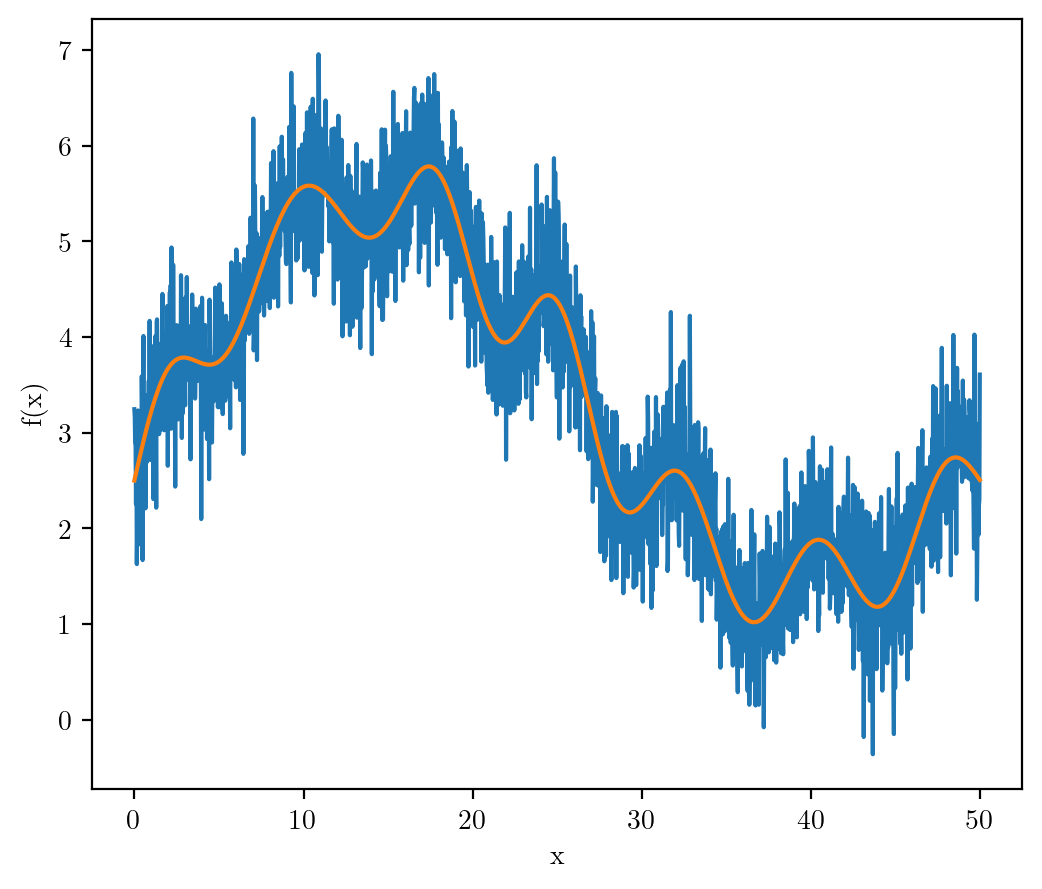

In [65]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

ax.plot(x, noisy)
ax.plot(x, orig)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

SciPy provides a convolution function `scipy.signal.convolve()` that can do the convolution for us directly.  To smooth the data, we want to use a Gaussian, which can be produced by `scipy.signal.gaussian()`.

Convolve the noisy data with a Gaussian and plot the result together with the original data `orig`.  You'll need to play with the width of the Gaussian to get a nice smoothing.  You also will need to normalize the Gaussian so that it sums to 1, otherwise, your convolved data will be shifted verfically from the original function.

In [66]:
from scipy.optimize import minimize
func = lambda std : np.sum((orig - convolve(noisy, 1/np.sqrt(2*np.pi*std**2)*gaussian(M=N, std=std, sym=True), \
                                            method='fft', mode='same'))**2)

res = minimize(func, x0=20)
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 26.55179593806723
        x: [ 1.123e+01]
      nit: 6
      jac: [-2.623e-06]
 hess_inv: [[ 6.715e+00]]
     nfev: 16
     njev: 8


In [67]:
std = res.x
gauss = 1/np.sqrt(2*np.pi*std**2)*gaussian(M=N, std=std, sym=True)
conv = convolve(noisy, gauss, method='fft', mode='same')

Text(0, 0.5, 'f(x)')

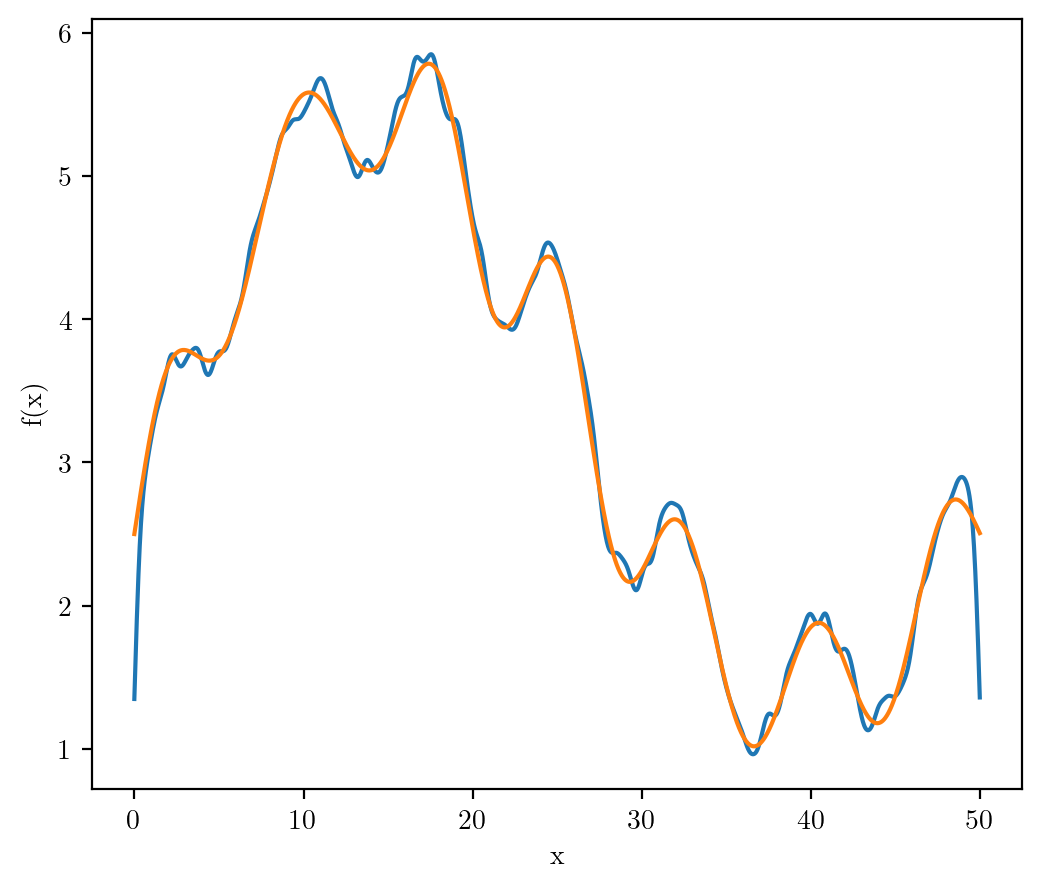

In [68]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

ax.plot(x, conv)
ax.plot(x, orig)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

## L05 - Mathematica

See the L05_Mathematica notebook

## L06 - Version control

### Q1: Your next research project

Pick the directory of your current research project (your next paper!) and put it under version control.


You thought me to keep every project under version control.
As an example, this is the link to the eccentricity project:    
https://github.com/m-boschini/eccentriccatastrophes


### Q2: Egocentric

Write a github action that lets you commit only if README.md contains your name.

## L07 - Numba & multiprocessing

### Q1: The stock market

(This is about numba)

A Markov Chain is defined as a sequence of random variables where a parameter depends *only* on the preceding value. This is a crucial tool in statistics, widely used in science and beyond (economics for instance).

For instance, the stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would be a Marov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

where the numbers on the arrows indicate the probabily that the next day will be in a given state.

Your task is to simulate the stock market according to this rule. Start from a random state and simulate many many  iterations. If your code is right, the fraction of days in each state should converge. 

Implement a pure-python version and a numba version, and compare speeds. 


In [2]:
from numpy.random import choice
from numba import njit
import time

In [55]:
prob_matrix = np.array(
    [[0.8, 0.25, 0.075], # 1 -> 1, 2, 3
     [0.05, 0.5, 0.025], # 2 -> 1, 2, 3
     [0.15, 0.25, 0.9]]) # 3 -> 1, 2, 3

eigenvals, eigenvec = np.linalg.eig(prob_matrix)
probs = eigenvec[:,np.isclose(eigenvals,1)]/np.sum(eigenvec[:,np.isclose(eigenvals,1)], axis=0)
probs


array([[0.3125],
       [0.0625],
       [0.625 ]])

In [19]:
#bear = 1, stagnant = 2, bull = 3

def evolveMrkt(state, n):
    mrkt_history = [state]
    
    for i in range(n):
        if state == 1:
            state = choice((1, 2, 3), p=(0.8, 0.05, 0.15))
        elif state == 2:
            state = choice((1, 2, 3), p=(0.25, 0.5, 0.25))
        else:
            state = choice((1, 2, 3), p=(0.075, 0.025, 0.9))
        mrkt_history += [state]
        
    return mrkt_history

@njit
def evolveMrkt_fast(state, n):
    mrkt_history = [state]
    new_state = lambda x, p1, p2 : 1 if(x <= p1) else (2 if(x > (1-p2)) else 3) 
    
    for i in range(n):
        if state == 1:
            state = new_state(np.random.random(), 0.8, 0.05)
        elif state == 2:
            state = new_state(np.random.random(), 0.25, 0.5)
        else:
            state = new_state(np.random.random(), 0.075, 0.025)
        mrkt_history += [state]
    return mrkt_history

In [20]:
N = np.logspace(1, 5, 10, dtype=int)
times = []

for n in N:
    tmp1, tmp2 = [],[]
    for i in range(5):
        state = choice([1, 2, 3])
        start = time.time()
        mrkt1 = evolveMrkt(state, n)
        tmp1 += [time.time()-start]

        start = time.time()
        mrkt2 = evolveMrkt_fast(state, n)
        tmp2 += [time.time()-start]
        
    times += [[np.mean(tmp1), np.mean(tmp2)]]
times = np.array(times)

mrkt1 = np.array(mrkt1)
mrkt2 = np.array(mrkt2)

[]

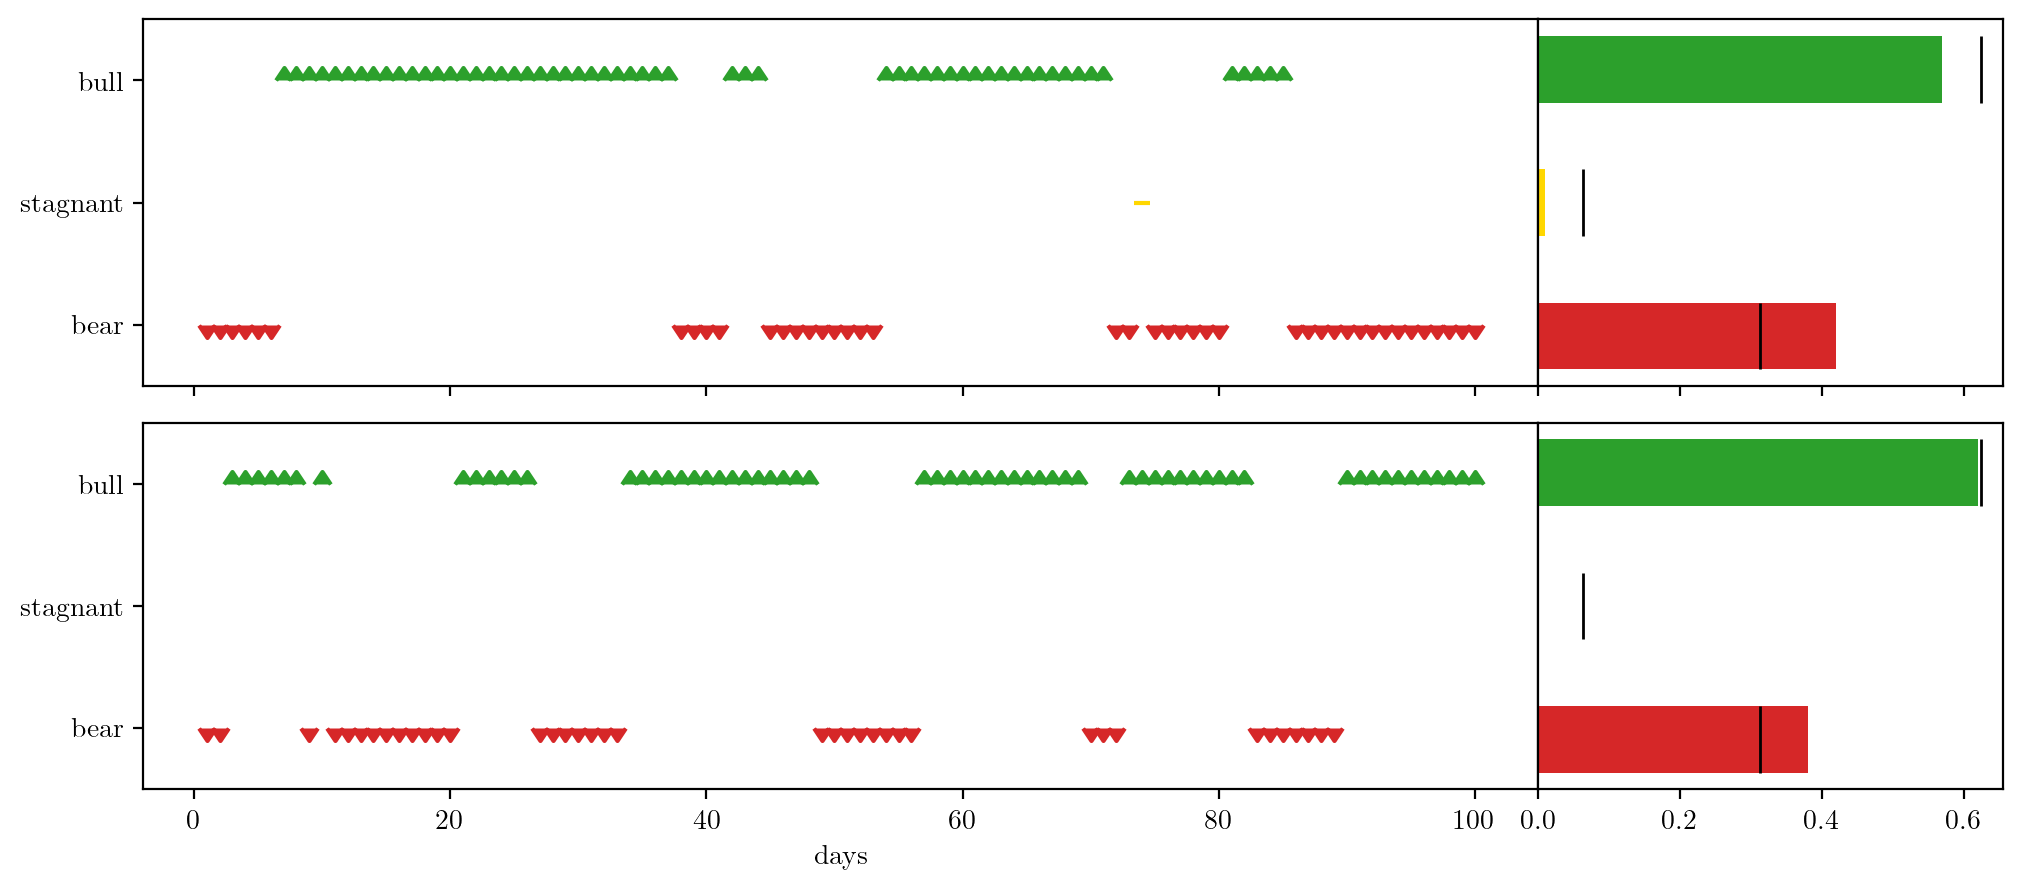

In [63]:
days = np.arange(1,101,1)

fig = plt.figure(figsize=(12,5))
fig.tight_layout()
axs = fig.subplots(2,2, sharex='col', width_ratios=[3,1], gridspec_kw={'hspace':0.1, 'wspace':0})


bear = np.where(mrkt1[:days[-1]] == 1)
stag = np.where(mrkt1[:days[-1]] == 2)
bull = np.where(mrkt1[:days[-1]] == 3)
for idxs, marker, color in zip([bear, stag, bull], [11, '_', 10], ['C3', 'gold', 'C2']):
    axs[0,0].scatter(days[idxs], mrkt1[idxs], marker=marker, color=color)
axs[0,0].set_ylim(0.5, 3.5)
axs[0,0].yaxis.set_ticks([1,2,3], ['bear', 'stagnant', 'bull'])

axs[0,1].barh(1, bear[0].shape[0]/days[-1], height=0.5, color='C3')
axs[0,1].barh(2, stag[0].shape[0]/days[-1], height=0.5, color='gold')
axs[0,1].barh(3, bull[0].shape[0]/days[-1], height=0.5, color='C2')
axs[0,1].vlines(probs, [0.75, 1.75, 2.75], [1.25, 2.25, 3.25], color='k', linewidth=1)
axs[0,1].set_yticks([])

bear = np.where(mrkt2[:days[-1]] == 1)
stag = np.where(mrkt2[:days[-1]] == 2)
bull = np.where(mrkt2[:days[-1]] == 3)
for idxs, marker, color in zip([bear, stag, bull], [11, '_', 10], ['C3', 'gold', 'C2']):
    axs[1,0].scatter(days[idxs], mrkt2[idxs], marker=marker, color=color)
axs[1,0].set_ylim(0.5, 3.5)
axs[1,0].yaxis.set_ticks([1,2,3], ['bear', 'stagnant', 'bull'])
axs[1,0].set_xlabel('days')

axs[1,1].barh(1, bear[0].shape[0]/days[-1], height=0.5, color='C3')
axs[1,1].barh(2, stag[0].shape[0]/days[-1], height=0.5, color='gold')
axs[1,1].barh(3, bull[0].shape[0]/days[-1], height=0.5, color='C2')
axs[1,1].vlines(probs, [0.75, 1.75, 2.75], [1.25, 2.25, 3.25], color='k', linewidth=1)
axs[1,1].set_yticks([])

Text(0, 0.5, '$t_{\\rm pyth}/t_{\\rm numba}$')

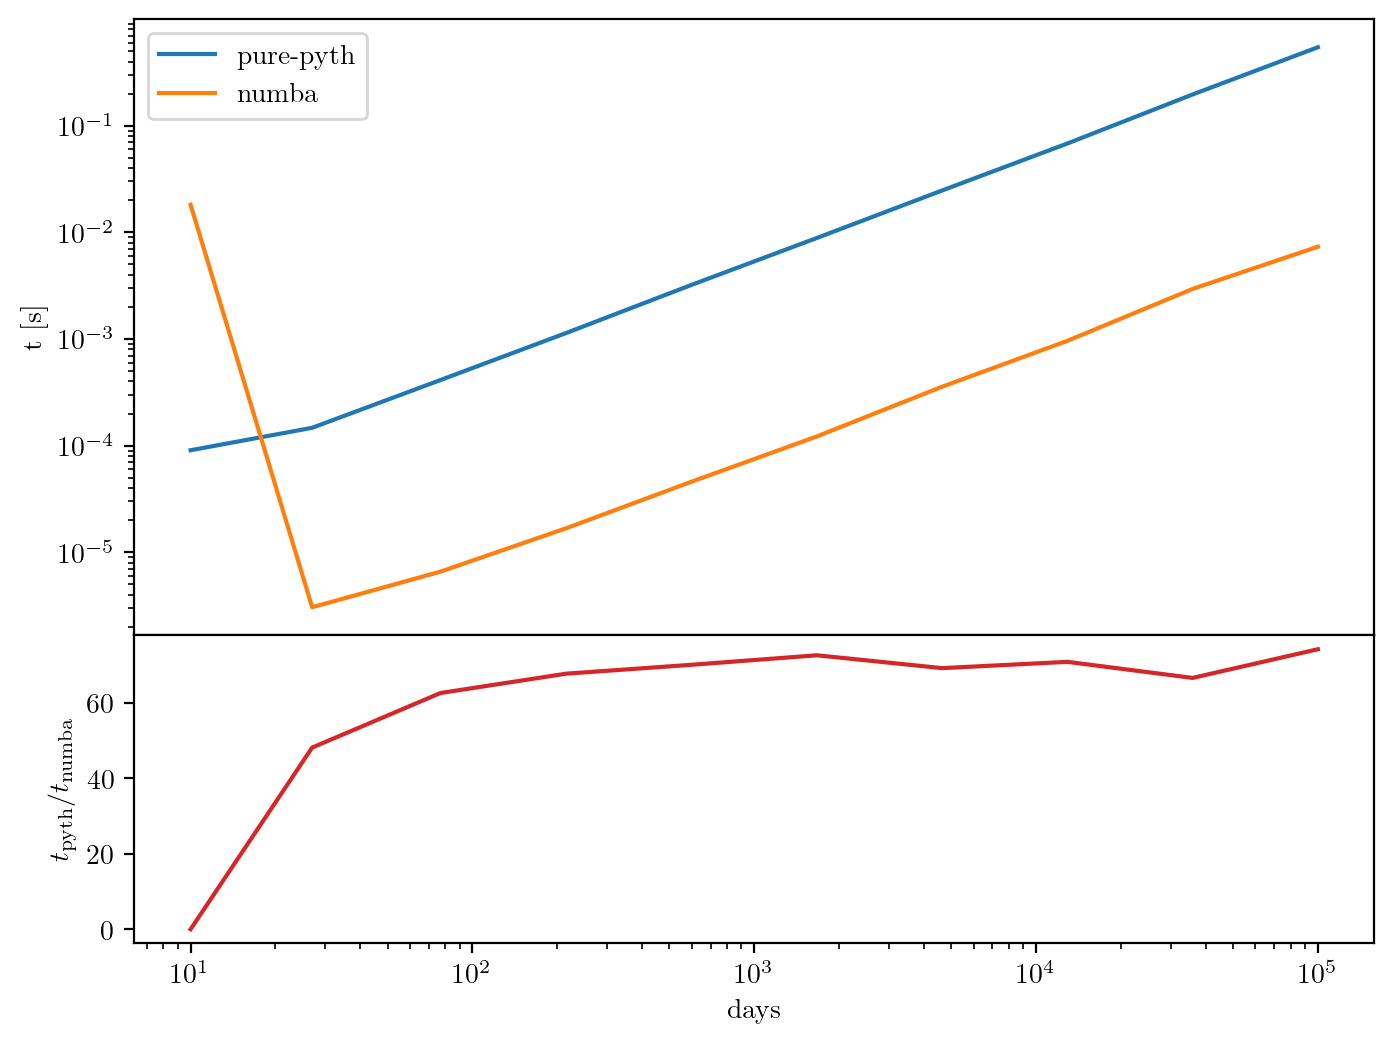

In [64]:
fig = plt.figure(figsize=(8, 6))
fig.tight_layout()
axs = fig.subplots(2,1, height_ratios=[2,1], sharex=True, gridspec_kw={'hspace':0})

axs[0].plot(N, times[:,0], label='pure-pyth')
axs[0].plot(N, times[:,1], label='numba')
axs[0].set_ylabel('t [s]')
axs[0].semilogx()
axs[0].semilogy()
axs[0].legend()

axs[1].plot(N, times[:,0]/times[:,1], color='C3')
axs[1].set_xlabel('days')
axs[1].set_ylabel(r'$t_{\rm pyth}/t_{\rm numba}$')

### Q2: Consistent Plotting

(This is about python's dectorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should intialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifill, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions. 
    
The decorator that I use for my papers is available in my python module [skywalker](https://github.com/dgerosa/skywalker).  

In [65]:
def standardPlot(func):
    def wrapper():
        import matplotlib.pyplot as plt
        
        plt.rcParams.update({
            'figure.figsize': (5, 4),
            'text.usetex': True, 
            'font.family':'Latin Modern Roman',
            'axes.labelsize':14,
            'legend.fontsize':12,
            'xtick.labelsize':13,
            'xtick.direction':'out',
            'xtick.top':True,
            'xtick.minor.visible':True,
            'ytick.labelsize':13,
            'ytick.direction':'out',
            'ytick.right':True,
            'ytick.minor.visible':True,
            'savefig.dpi': 500,
            'savefig.format': 'pdf'
        })
        
        fig, ax = plt.subplots()
        result = func(ax=ax)
        plt.tight_layout()
        plt.savefig(f"{func.__name__}.pdf")
        return result
    return wrapper

Text(0, 0.5, 'y')

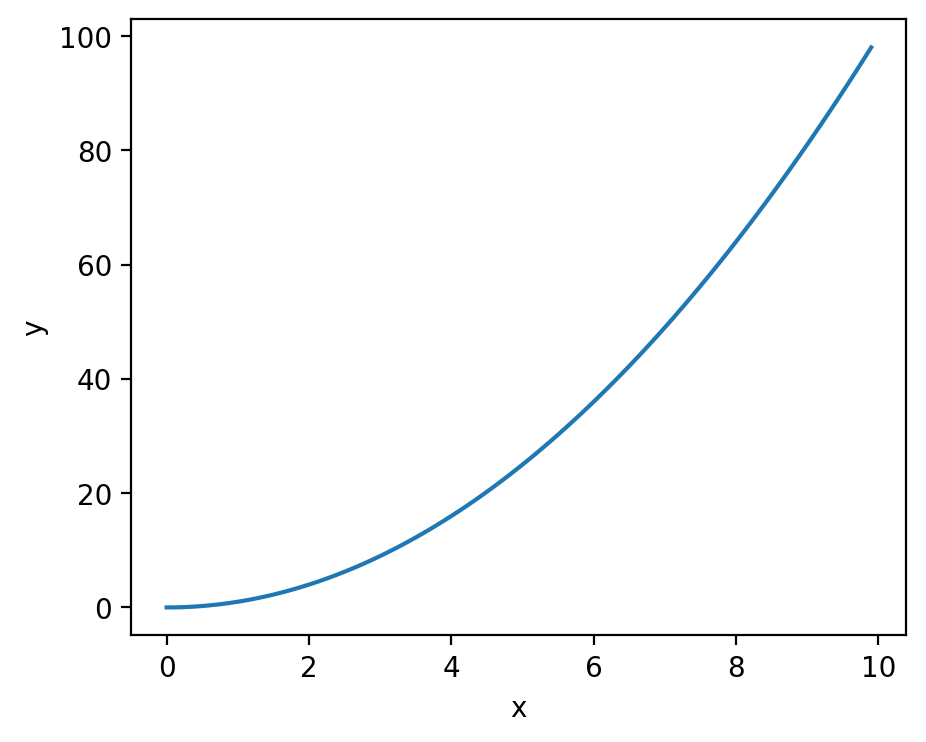

In [66]:
plt.rcdefaults()
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(0,10,0.1), np.arange(0,10,0.1)**2)
ax.set_xlabel('x')
ax.set_ylabel('y')

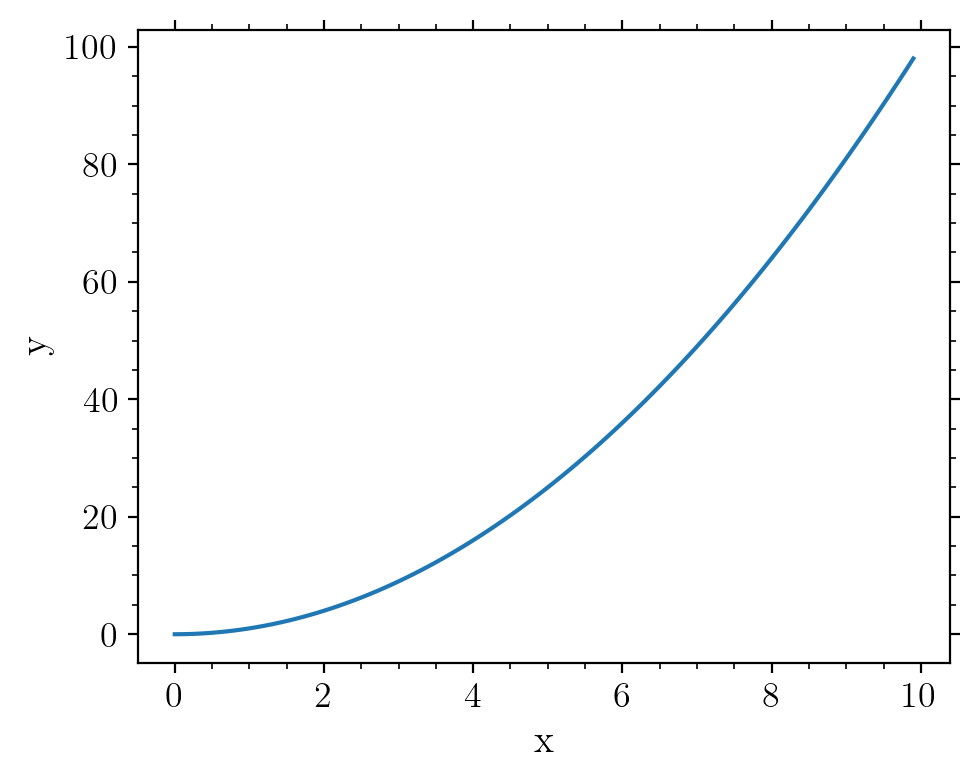

In [67]:
@standardPlot
def myPlot(ax):
    ax.plot(np.arange(0,10,0.1), np.arange(0,10,0.1)**2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
myPlot()

## L08 - pytest

### Q1: I love pip

- Take a piece of python code you wrote (for instance pick one of the exercises you've done for this class). 
- Turn it into a module
- Install it locally
- Deploy on pypi (only using the test-pypi server!)

<div class="alert alert-block alert-warning">
<span class="fa fa-flash"></span> VERY IMPORTANT
    
Both the pypi and test-pypi server are public on the web! Don't compromise your research by putting up something your competitors can use and steal your idea before you've published a paper on it!!! 

</div>

### Q2: My own test

- Pick a piece of python code that you like (your own PhD project, or take one of the exercises from this class). Implement a unit test and a regression test. 
- Put it under git version control, and write a github action that runs the tests at every commit.
- Edit the github options to make sure the code *cannot* be committed if the tests fail (that's a common thing for big projects with many collaborations, nobody is allowed to break the code)

